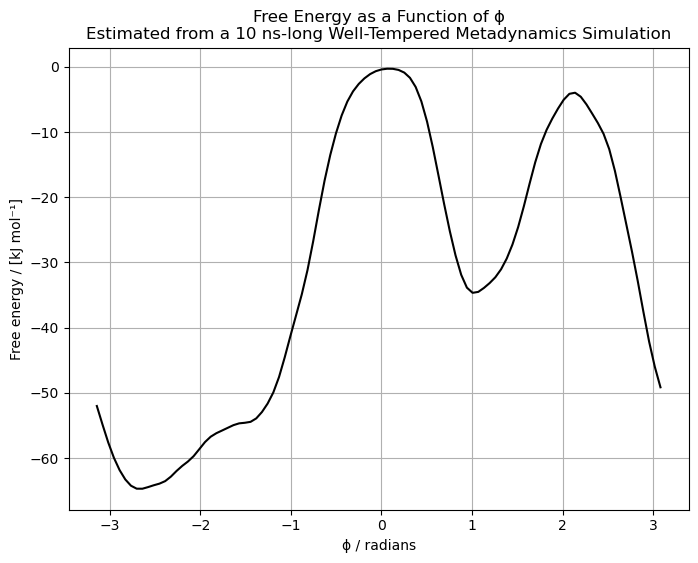

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO  # Import StringIO from the io module

# Step 1: Load the 'fes.dat' file
fes_file = 'fes.dat'  # Update with the correct file path

# Read the file while skipping initial comment lines
with open(fes_file, 'r') as file:
    # Read all lines
    lines = file.readlines()

# Filter out lines that start with '#'
filtered_lines = [line for line in lines if not line.startswith('#')]

# Create a DataFrame from the filtered lines
fes_data = pd.read_csv(
    StringIO(''.join(filtered_lines)),  # Join the filtered lines into a single string
    delim_whitespace=True,
    header=None,   # No header in the data, as we are specifying column names
    names=['phi', 'psi', 'free_energy', 'der_phi', 'der_psi'],  # Define the columns
)

# Step 2: Extract the columns for plotting (only phi and free_energy)
phi = fes_data['phi'].to_numpy(dtype=float)
free_energy = fes_data['free_energy'].to_numpy(dtype=float)

# Remove duplicates (keeping the first occurrence)
unique_data = pd.DataFrame({'phi': phi, 'free_energy': free_energy}).drop_duplicates(subset=['phi'])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(unique_data['phi'], unique_data['free_energy'], color='black')  # Simple line plot
plt.xlabel('ϕ / radians')
plt.ylabel('Free energy / [kJ mol⁻¹]')
plt.title('Free Energy as a Function of ϕ\nEstimated from a 10 ns-long Well-Tempered Metadynamics Simulation')
plt.grid(True)


plt.show()
